<a href="https://colab.research.google.com/github/dlghwns100/today_TIL/blob/main/ex07_%ED%8C%A8%EC%85%98%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%ED%99%9C%EC%84%B1%ED%99%94%2C_%EC%B5%9C%EC%A0%81%ED%99%94_%ED%95%A8%EC%88%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###목표
- 10종류의 패션 이미지 데이터를 분류하는 신경망 모델을 만들어보자
- 중간층 활성화 함수와 최적화 함수를 변화시켜가며 결과를 비교해보자

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = data

In [ ]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

- 활성화함수, 최적화함수 별 비교
1. 중간층 활성화 함수 : sigmoid, 최적화 함수: SGD
2. 중간층 활성화 함수 : relu, 최적화 함수: SGD
3. 중간층 활성화 함수 : relu, 최적화 함수: Adam

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
model1 = Sequential()
model1.add(Flatten(input_shape =(28, 28)))
model1.add(Dense(1500, activation='sigmoid'))
model1.add(Dense(500, activation='sigmoid'))
model1.add(Dense(100, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(learning_rate=0.001),metrics=['acc'])

h1 = model1.fit(X_train, y_train_one_hot, epochs=30, batch_size=256, validation_split=0.2)

Epoch 1/30
188/188 [==============================] - 7s 8ms/step - loss: 2.3963 - acc: 0.1100 - val_loss: 2.3264 - val_acc: 0.1347
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 2.2837 - acc: 0.2187 - val_loss: 2.2536 - val_acc: 0.3127
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 2.2316 - acc: 0.3918 - val_loss: 2.2137 - val_acc: 0.4412
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 2.1982 - acc: 0.5008 - val_loss: 2.1836 - val_acc: 0.5603
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 2.1701 - acc: 0.5831 - val_loss: 2.1564 - val_acc: 0.6077
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 2.1434 - acc: 0.6161 - val_loss: 2.1300 - val_acc: 0.6317
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 2.1172 - acc: 0.6337 - val_loss: 2.1038 - val_acc: 0.6457
Epoch 8/30
188/188 [==============================] - 1s 5ms/step - loss: 2.

In [ ]:
model2 = Sequential()
model2.add(Flatten(input_shape =(28, 28)))
model2.add(Dense(1500, activation='relu'))
model2.add(Dense(500, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['acc'])

h2 = model2.fit(X_train, y_train_one_hot, epochs=30, batch_size=256, validation_split=0.2)

Epoch 1/30
188/188 [==============================] - 2s 6ms/step - loss: nan - acc: 0.0994 - val_loss: nan - val_acc: 0.1030
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 4/30
188/188 [==============================] - 1s 5ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc: 0.1030
Epoch 8/30
188/188 [==============================] - 1s 6ms/step - loss: nan - acc: 0.0993 - val_loss: nan - val_acc:

In [ ]:
model3 = Sequential()
model3.add(Flatten(input_shape =(28, 28)))
model3.add(Dense(1500, activation='relu'))
model3.add(Dense(500, activation='relu'))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

h3 = model3.fit(X_train, y_train_one_hot, epochs=30, batch_size=256, validation_split=0.2)

Epoch 1/30
188/188 [==============================] - 3s 6ms/step - loss: 10.7796 - acc: 0.7244 - val_loss: 1.6777 - val_acc: 0.7335
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.7927 - acc: 0.8149 - val_loss: 0.7505 - val_acc: 0.8102
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.5886 - acc: 0.8371 - val_loss: 0.5914 - val_acc: 0.8259
Epoch 4/30
188/188 [==============================] - 1s 7ms/step - loss: 0.4498 - acc: 0.8576 - val_loss: 0.5138 - val_acc: 0.8473
Epoch 5/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3721 - acc: 0.8741 - val_loss: 0.4279 - val_acc: 0.8637
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3326 - acc: 0.8835 - val_loss: 0.4131 - val_acc: 0.8685
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3057 - acc: 0.8903 - val_loss: 0.4581 - val_acc: 0.8567
Epoch 8/30
188/188 [==============================] - 1s 5ms/step - loss: 0

In [ ]:
#model1.compile(loss='mse',optimizer='SGD',metrics=['acc'])

In [ ]:
#model2.compile(loss='mse',optimizer='SGD',metrics=['acc'])

In [ ]:
#model3.compile(loss='mse',optimizer='Adam',metrics=['acc'])

In [ ]:
#h1 = model1.fit(X_train, y_train_one_hot, epochs=30, batch_size=256, validation_data=(X_val, y_val_one_hot))

In [ ]:
#h2 = model2.fit(X_train, y_train_one_hot, epochs=30, batch_size=256, validation_data=(X_val, y_val_one_hot))

In [ ]:
#h3 = model3.fit(X_train, y_train_one_hot, epochs=30, batch_size=256, validation_data=(X_val, y_val_one_hot))

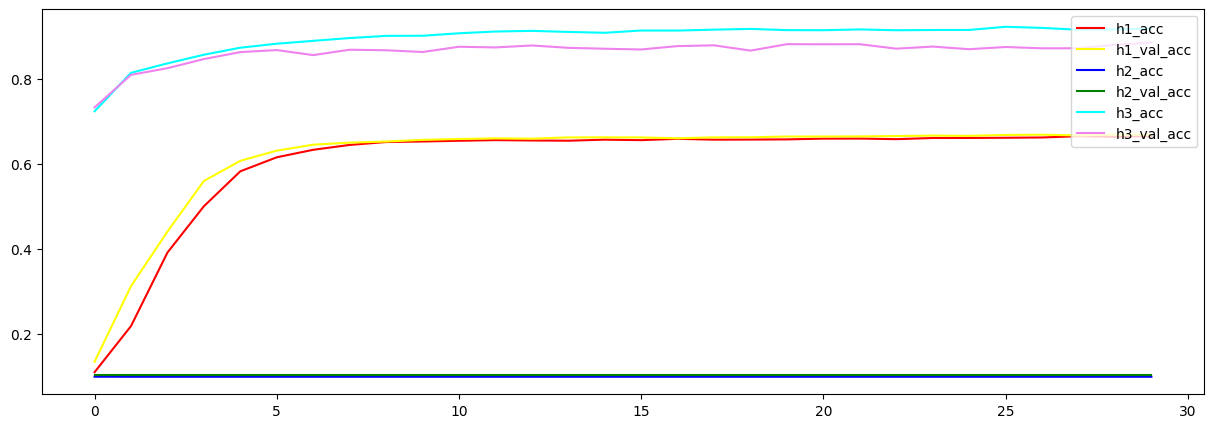

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h1.history['acc'], label='h1_acc',color='red')
plt.plot(h1.history['val_acc'], label='h1_val_acc',color='yellow')

plt.plot(h2.history['acc'], label='h2_acc',color='blue')
plt.plot(h2.history['val_acc'], label='h2_val_acc',color='green')

plt.plot(h3.history['acc'], label='h3_acc',color='cyan')
plt.plot(h3.history['val_acc'], label='h3_val_acc',color='violet')
plt.legend(loc='upper right')
plt.show()

### 최적화 모델 찾기
- 모델 체크 포인트 : 모델저장
- 얼리스탑핑 : 조기학습중단(과대적합, 시간낭비 방지)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 1. 모델 저장
# 저장 경로 및 파일명 형태 설정
save_path = '/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정/model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# d : 10진수 / 03d : 0이 3개 붙어있는 형태의 자리수(001, 002, ...)
# f : 소수점 / .4f : 소수점 4자리까지 형태의 자리수(0.0001, 0.0002)
# hdf5: 저장되는 모델의 파일의 확장자명

f_mckp = ModelCheckpoint(
    filepath=save_path, # 파일경로설정
    monitor='val_acc', # 해당값을 기준으로 파일을 저장
    save_best_only = True, # monitor 값이 가장 최고점 혹은 최저점을 갱신했을 경우 모델을 지정
    mode = 'max', # save_best_only가 True인 경우 갱신값의 최대, 최소 결정
    verbose = 1  # 모델 개선 및 저장 메시지를 출력
    )

In [ ]:
from pandas.core.reshape.merge import partial
# 2. 학습 조기 중단
f_early = EarlyStopping(
    monitor='val_acc',
    patience = 5, # monitor의 값 개선을 몇번이나 기다려줄지를 결정

    )
# -> 모델 학습시 val_acc가 5번의 epochs를 돌 동안 개선되지 않으면 학습을 중단

In [ ]:
model4 = Sequential()
model4.add(Flatten(input_shape =(28, 28)))
model4.add(Dense(1500, activation='relu'))
model4.add(Dense(500, activation='relu'))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])

h4 = model4.fit(X_train, y_train_one_hot, epochs=30, batch_size=256, validation_split=0.2, callbacks=[f_mckp,f_early])

Epoch 1/30
179/188 [===========================>..] - ETA: 0s - loss: 9.6162 - acc: 0.7191 
Epoch 1: val_acc improved from -inf to 0.81058, saving model to /content/drive/MyDrive/sw캠프 데이터 비즈니스 과정/model/FashionModel_001_0.8106.hdf5
188/188 [==============================] - 4s 8ms/step - loss: 9.2299 - acc: 0.7227 - val_loss: 0.9632 - val_acc: 0.8106
Epoch 2/30
180/188 [===========================>..] - ETA: 0s - loss: 0.7710 - acc: 0.8229
Epoch 2: val_acc improved from 0.81058 to 0.84250, saving model to /content/drive/MyDrive/sw캠프 데이터 비즈니스 과정/model/FashionModel_002_0.8425.hdf5
188/188 [==============================] - 1s 5ms/step - loss: 0.7674 - acc: 0.8231 - val_loss: 0.6352 - val_acc: 0.8425
Epoch 3/30
178/188 [===========================>..] - ETA: 0s - loss: 0.5176 - acc: 0.8508
Epoch 3: val_acc improved from 0.84250 to 0.85450, saving model to /content/drive/MyDrive/sw캠프 데이터 비즈니스 과정/model/FashionModel_003_0.8545.hdf5
188/188 [=============

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
best_model =load_model('/content/drive/MyDrive/sw캠프 데이터 비즈니스 과정/model/FashionModel_001_0.8106.hdf5')

In [ ]:
best_model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 1.0284 - acc: 0.8063


[1.0283621549606323, 0.8062999844551086]